<div style="background-color: #fefefe ;border: 5px solid #60B5FF;">
    <header style="; display:flex; padding: 10px 20px">
        <img src="https://ugc.production.linktr.ee/70ae7335-638e-46b4-baff-7e7700847a2f_IMG-20231018-WA0014-1-.jpeg?io=true&size=thumbnail-stack-v1_0" style="width: 200px ; height: 200px ; margin-right: 600px"/>
        <img src="https://images.wuzzuf-data.net/files/company_logo/Skills-Dynamics-Egypt-63587-1619607548.jpg" style="width: 200px ; height: 200px"/>
    </header>
    <div style=" padding: 20px ;  border-radius: 5px">
        <h2 style="color: #FBA518; font-weight: bold; font-size: 35px; text-decoration: underline ; text-align: center">Sales Forecasting and Optimization Project</h2>
        <div>
            <ul>
                <li style="color: #373A40; font-weight: bold; font-size: 22px ; margin-left: 20px">Importing Libraries & Reading Data</li>
                <li style="color: #373A40; font-weight: bold; font-size: 22px ; margin-left: 20px">Data Inspection</li>
                <li style="color: #373A40; font-weight: bold; font-size: 22px ; margin-left: 20px">Handle Missing Values and Outliers</li>
                <li style="color: #373A40; font-weight: bold; font-size: 22px ; margin-left: 20px">EDA</li>
                <li style="color: #373A40; font-weight: bold; font-size: 22px ; margin-left: 20px">Encoding</li> 
                <li style="color: #373A40; font-weight: bold; font-size: 22px ; margin-left: 20px">Modeling</li>
            </ul>
        </div> 
    </div>
</div>
<br>

<div style="padding:10px;
            color:#3A3A3C;
            margin:10px;
            font-size:130%;
            border-radius:5px;
            background-color:#E5E5EA;
            font-weight:400">
    <b>Importing Libraries and Reading Data</b>
</div>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import joblib
import mlflow
import mlflow.sklearn
import pickle
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import  train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from scipy.stats import f_oneway
from sklearn.ensemble import RandomForestRegressor

In [2]:
# Load the dataset
file_path = "dairy_dataset.csv"  
df = pd.read_csv(r"C:\Users\EMAM ABD EL MONSEF\Desktop\final\dairy_dataset.csv")

df.head()

,Location,Total Land Area (acres),Number of Cows,Farm Size,Date,Product ID,Product Name,Brand,Quantity (liters/kg),Price per Unit,...,Production Date,Expiration Date,Quantity Sold (liters/kg),Price per Unit (sold),Approx. Total Revenue(INR),Customer Location,Sales Channel,Quantity in Stock (liters/kg),Minimum Stock Threshold (liters/kg),Reorder Quantity (liters/kg)
0,Telangana,310.84,96,Medium,2022-02-17,5,Ice Cream,Dodla Dairy,222.40,85.72,...,2021-12-27,2022-01-21,7,82.24,575.68,Madhya Pradesh,Wholesale,215,19.55,64.03
1,Uttar Pradesh,19.19,44,Large,2021-12-01,1,Milk,Amul,687.48,42.61,...,2021-10-03,2021-10-25,558,39.24,21895.92,Kerala,Wholesale,129,43.17,181.10
2,Tamil Nadu,581.69,24,Medium,2022-02-28,4,Yogurt,Dodla Dairy,503.48,36.50,...,2022-01-14,2022-02-13,256,33.81,8655.36,Madhya Pradesh,Online,247,15.10,140.83
3,Telangana,908.00,89,Small,2019-06-09,3,Cheese,Britannia Industries,823.36,26.52,...,2019-05-15,2019-07-26,601,28.92,17380.92,Rajasthan,Online,222,74.50,57.68
4,Maharashtra,861.95,21,Medium,2020-12-14,8,Buttermilk,Mother Dairy,147.77,83.85,...,2020-10-17,2020-10-28,145,83.07,12045.15,Jharkhand,Retail,2,76.02,33.40


<div style="padding:10px;
            color:#3A3A3C;
            margin:10px;
            font-size:130%;
            border-radius:5px;
            background-color:#E5E5EA;
            font-weight:400">
    <b>Data Inspection</b>
</div>

In [3]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4325 entries, 0 to 4324
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Location                             4325 non-null   object 
 1   Total Land Area (acres)              4325 non-null   float64
 2   Number of Cows                       4325 non-null   int64  
 3   Farm Size                            4325 non-null   object 
 4   Date                                 4325 non-null   object 
 5   Product ID                           4325 non-null   int64  
 6   Product Name                         4325 non-null   object 
 7   Brand                                4325 non-null   object 
 8   Quantity (liters/kg)                 4325 non-null   float64
 9   Price per Unit                       4325 non-null   float64
 10  Total Value                          4325 non-null   float64
 11  Shelf Life (days)             

In [4]:
df.head()

,Location,Total Land Area (acres),Number of Cows,Farm Size,Date,Product ID,Product Name,Brand,Quantity (liters/kg),Price per Unit,...,Production Date,Expiration Date,Quantity Sold (liters/kg),Price per Unit (sold),Approx. Total Revenue(INR),Customer Location,Sales Channel,Quantity in Stock (liters/kg),Minimum Stock Threshold (liters/kg),Reorder Quantity (liters/kg)
0,Telangana,310.84,96,Medium,2022-02-17,5,Ice Cream,Dodla Dairy,222.40,85.72,...,2021-12-27,2022-01-21,7,82.24,575.68,Madhya Pradesh,Wholesale,215,19.55,64.03
1,Uttar Pradesh,19.19,44,Large,2021-12-01,1,Milk,Amul,687.48,42.61,...,2021-10-03,2021-10-25,558,39.24,21895.92,Kerala,Wholesale,129,43.17,181.10
2,Tamil Nadu,581.69,24,Medium,2022-02-28,4,Yogurt,Dodla Dairy,503.48,36.50,...,2022-01-14,2022-02-13,256,33.81,8655.36,Madhya Pradesh,Online,247,15.10,140.83
3,Telangana,908.00,89,Small,2019-06-09,3,Cheese,Britannia Industries,823.36,26.52,...,2019-05-15,2019-07-26,601,28.92,17380.92,Rajasthan,Online,222,74.50,57.68
4,Maharashtra,861.95,21,Medium,2020-12-14,8,Buttermilk,Mother Dairy,147.77,83.85,...,2020-10-17,2020-10-28,145,83.07,12045.15,Jharkhand,Retail,2,76.02,33.40


In [5]:
# Calculate the mean for all numerical columns
mean_values = df.mean(numeric_only=True)

print("Mean values of numerical columns:")
df.describe().T

Mean values of numerical columns:


,count,mean,std,min,25%,50%,75%,max
Total Land Area (acres),4325.0,503.483073,285.935061,10.1700,252.9500,509.1700,751.250,999.5300
Number of Cows,4325.0,54.963699,26.111487,10.0000,32.0000,55.0000,77.000,100.0000
Product ID,4325.0,5.509595,2.842979,1.0000,3.0000,6.0000,8.000,10.0000
Quantity (liters/kg),4325.0,500.652657,288.975915,1.1700,254.1700,497.5500,749.780,999.9300
Price per Unit,4325.0,54.785938,26.002815,10.0300,32.4600,54.4000,77.460,99.9900
Total Value,4325.0,27357.845411,21621.051594,42.5165,9946.8145,21869.6529,40954.441,99036.3696
Shelf Life (days),4325.0,29.127630,30.272114,1.0000,10.0000,22.0000,30.000,150.0000
Quantity Sold (liters/kg),4325.0,248.095029,217.024182,1.0000,69.0000,189.0000,374.000,960.0000
Price per Unit (sold),4325.0,54.779140,26.192790,5.2100,32.6400,54.1400,77.460,104.5100
Approx. Total Revenue(INR),4325.0,13580.265401,14617.009122,12.5400,2916.6500,8394.5400,19504.550,89108.9000


In [6]:
mode_values = df.mode().iloc[0]  # Get the first mode in case of multiple modes

print("Mode for each column in the dataset:")
print(mode_values)

Mode for each column in the dataset:
Location                                      Delhi
Total Land Area (acres)                      609.62
Number of Cows                                 25.0
Farm Size                                     Large
Date                                     2021-01-28
Product ID                                      6.0
Product Name                                   Curd
Brand                                          Amul
Quantity (liters/kg)                           34.5
Price per Unit                                85.72
Total Value                                 42.5165
Shelf Life (days)                               7.0
Storage Condition                      Refrigerated
Production Date                          2019-09-03
Expiration Date                          2019-07-27
Quantity Sold (liters/kg)                       1.0
Price per Unit (sold)                          14.3
Approx. Total Revenue(INR)                   129.78
Customer Location          

In [7]:
# Find the product with the highest quantity sold on 2021-01-08
filtered_df = df[df["Date"] == "2021-01-28"]
most_sold_product = filtered_df.loc[filtered_df["Quantity Sold (liters/kg)"].idxmax(), ["Product Name", "Quantity Sold (liters/kg)"]]

print("Most sold product on 2021-01-28:")
print(most_sold_product)

Most sold product on 2021-01-28:
Product Name                 Ice Cream
Quantity Sold (liters/kg)          889
Name: 407, dtype: object


<div style="padding:10px;
            color:#3A3A3C;
            margin:10px;
            font-size:130%;
            border-radius:5px;
            background-color:#E5E5EA;
            font-weight:400">
    <b>Handle Missing Values and Outliers</b>
</div>

In [8]:
# Drop rows if they have more than 50% missing values
df.dropna(thresh=df.shape[1] * 0.5, inplace=True)

df

,Location,Total Land Area (acres),Number of Cows,Farm Size,Date,Product ID,Product Name,Brand,Quantity (liters/kg),Price per Unit,...,Production Date,Expiration Date,Quantity Sold (liters/kg),Price per Unit (sold),Approx. Total Revenue(INR),Customer Location,Sales Channel,Quantity in Stock (liters/kg),Minimum Stock Threshold (liters/kg),Reorder Quantity (liters/kg)
0,Telangana,310.84,96,Medium,2022-02-17,5,Ice Cream,Dodla Dairy,222.40,85.72,...,2021-12-27,2022-01-21,7,82.24,575.68,Madhya Pradesh,Wholesale,215,19.55,64.03
1,Uttar Pradesh,19.19,44,Large,2021-12-01,1,Milk,Amul,687.48,42.61,...,2021-10-03,2021-10-25,558,39.24,21895.92,Kerala,Wholesale,129,43.17,181.10
2,Tamil Nadu,581.69,24,Medium,2022-02-28,4,Yogurt,Dodla Dairy,503.48,36.50,...,2022-01-14,2022-02-13,256,33.81,8655.36,Madhya Pradesh,Online,247,15.10,140.83
3,Telangana,908.00,89,Small,2019-06-09,3,Cheese,Britannia Industries,823.36,26.52,...,2019-05-15,2019-07-26,601,28.92,17380.92,Rajasthan,Online,222,74.50,57.68
4,Maharashtra,861.95,21,Medium,2020-12-14,8,Buttermilk,Mother Dairy,147.77,83.85,...,2020-10-17,2020-10-28,145,83.07,12045.15,Jharkhand,Retail,2,76.02,33.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4320,Delhi,748.71,89,Medium,2022-02-24,6,Curd,Mother Dairy,554.90,88.45,...,2022-02-16,2022-02-21,352,87.20,30694.40,Uttar Pradesh,Online,202,98.07,33.53
4321,Jharkhand,385.91,29,Large,2022-05-14,4,Yogurt,Palle2patnam,818.33,55.35,...,2022-03-22,2022-04-14,68,58.39,3970.52,Kerala,Retail,750,87.41,114.37
4322,Chandigarh,311.54,65,Small,2020-01-05,6,Curd,Mother Dairy,583.56,92.61,...,2020-01-04,2020-01-11,141,89.46,12613.86,Haryana,Retail,442,33.47,153.66
4323,Maharashtra,890.55,90,Small,2022-10-25,6,Curd,Raj,3.10,15.30,...,2022-10-02,2022-10-09,2,10.56,21.12,Jharkhand,Wholesale,1,58.25,160.84


In [9]:
# Fill missing numerical values with mean
num_cols = df.select_dtypes(include=["number"]).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

df

,Location,Total Land Area (acres),Number of Cows,Farm Size,Date,Product ID,Product Name,Brand,Quantity (liters/kg),Price per Unit,...,Production Date,Expiration Date,Quantity Sold (liters/kg),Price per Unit (sold),Approx. Total Revenue(INR),Customer Location,Sales Channel,Quantity in Stock (liters/kg),Minimum Stock Threshold (liters/kg),Reorder Quantity (liters/kg)
0,Telangana,310.84,96,Medium,2022-02-17,5,Ice Cream,Dodla Dairy,222.40,85.72,...,2021-12-27,2022-01-21,7,82.24,575.68,Madhya Pradesh,Wholesale,215,19.55,64.03
1,Uttar Pradesh,19.19,44,Large,2021-12-01,1,Milk,Amul,687.48,42.61,...,2021-10-03,2021-10-25,558,39.24,21895.92,Kerala,Wholesale,129,43.17,181.10
2,Tamil Nadu,581.69,24,Medium,2022-02-28,4,Yogurt,Dodla Dairy,503.48,36.50,...,2022-01-14,2022-02-13,256,33.81,8655.36,Madhya Pradesh,Online,247,15.10,140.83
3,Telangana,908.00,89,Small,2019-06-09,3,Cheese,Britannia Industries,823.36,26.52,...,2019-05-15,2019-07-26,601,28.92,17380.92,Rajasthan,Online,222,74.50,57.68
4,Maharashtra,861.95,21,Medium,2020-12-14,8,Buttermilk,Mother Dairy,147.77,83.85,...,2020-10-17,2020-10-28,145,83.07,12045.15,Jharkhand,Retail,2,76.02,33.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4320,Delhi,748.71,89,Medium,2022-02-24,6,Curd,Mother Dairy,554.90,88.45,...,2022-02-16,2022-02-21,352,87.20,30694.40,Uttar Pradesh,Online,202,98.07,33.53
4321,Jharkhand,385.91,29,Large,2022-05-14,4,Yogurt,Palle2patnam,818.33,55.35,...,2022-03-22,2022-04-14,68,58.39,3970.52,Kerala,Retail,750,87.41,114.37
4322,Chandigarh,311.54,65,Small,2020-01-05,6,Curd,Mother Dairy,583.56,92.61,...,2020-01-04,2020-01-11,141,89.46,12613.86,Haryana,Retail,442,33.47,153.66
4323,Maharashtra,890.55,90,Small,2022-10-25,6,Curd,Raj,3.10,15.30,...,2022-10-02,2022-10-09,2,10.56,21.12,Jharkhand,Wholesale,1,58.25,160.84


In [10]:
# Detect and Handle Outliers using IQR ###
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)

IQR = Q3 - Q1

In [11]:
# Removing outliers using IQR method
df = df[~((df[num_cols] < (Q1 - 1.5 * IQR)) | (df[num_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
df

,Location,Total Land Area (acres),Number of Cows,Farm Size,Date,Product ID,Product Name,Brand,Quantity (liters/kg),Price per Unit,...,Production Date,Expiration Date,Quantity Sold (liters/kg),Price per Unit (sold),Approx. Total Revenue(INR),Customer Location,Sales Channel,Quantity in Stock (liters/kg),Minimum Stock Threshold (liters/kg),Reorder Quantity (liters/kg)
0,Telangana,310.84,96,Medium,2022-02-17,5,Ice Cream,Dodla Dairy,222.40,85.72,...,2021-12-27,2022-01-21,7,82.24,575.68,Madhya Pradesh,Wholesale,215,19.55,64.03
1,Uttar Pradesh,19.19,44,Large,2021-12-01,1,Milk,Amul,687.48,42.61,...,2021-10-03,2021-10-25,558,39.24,21895.92,Kerala,Wholesale,129,43.17,181.10
2,Tamil Nadu,581.69,24,Medium,2022-02-28,4,Yogurt,Dodla Dairy,503.48,36.50,...,2022-01-14,2022-02-13,256,33.81,8655.36,Madhya Pradesh,Online,247,15.10,140.83
4,Maharashtra,861.95,21,Medium,2020-12-14,8,Buttermilk,Mother Dairy,147.77,83.85,...,2020-10-17,2020-10-28,145,83.07,12045.15,Jharkhand,Retail,2,76.02,33.40
5,Telangana,87.64,51,Medium,2019-01-07,6,Curd,Raj,593.92,85.54,...,2019-01-03,2019-01-08,74,84.75,6271.50,Gujarat,Retail,519,55.60,139.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4320,Delhi,748.71,89,Medium,2022-02-24,6,Curd,Mother Dairy,554.90,88.45,...,2022-02-16,2022-02-21,352,87.20,30694.40,Uttar Pradesh,Online,202,98.07,33.53
4321,Jharkhand,385.91,29,Large,2022-05-14,4,Yogurt,Palle2patnam,818.33,55.35,...,2022-03-22,2022-04-14,68,58.39,3970.52,Kerala,Retail,750,87.41,114.37
4322,Chandigarh,311.54,65,Small,2020-01-05,6,Curd,Mother Dairy,583.56,92.61,...,2020-01-04,2020-01-11,141,89.46,12613.86,Haryana,Retail,442,33.47,153.66
4323,Maharashtra,890.55,90,Small,2022-10-25,6,Curd,Raj,3.10,15.30,...,2022-10-02,2022-10-09,2,10.56,21.12,Jharkhand,Wholesale,1,58.25,160.84


<div style="padding:10px;
            color:#3A3A3C;
            margin:10px;
            font-size:130%;
            border-radius:5px;
            background-color:#E5E5EA;
            font-weight:400">
    <b>Exploratory Data Analysis (EDA)</b>
</div>

In [12]:
sns.set(style="whitegrid")

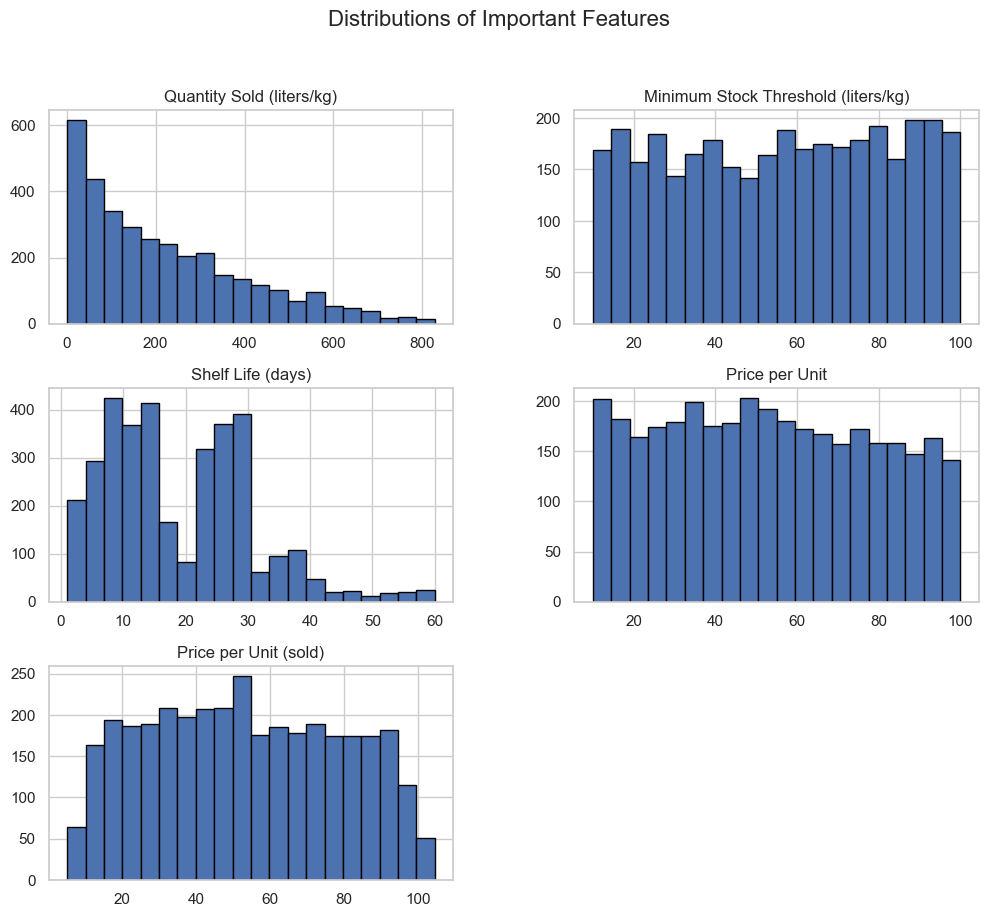

In [13]:
important_features = [
    'Farm Size',
    'Quantity Sold (liters/kg)',
    'Minimum Stock Threshold (liters/kg)',
    'Shelf Life (days)',
    'Price per Unit' ,
    'Price per Unit (sold)'   
]

df[important_features].hist(figsize=(12, 10), bins=20, edgecolor='black')
plt.suptitle("Distributions of Important Features", fontsize=16)
plt.show()

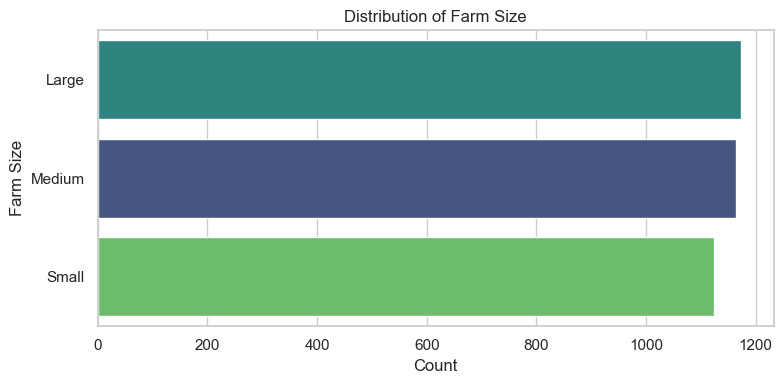

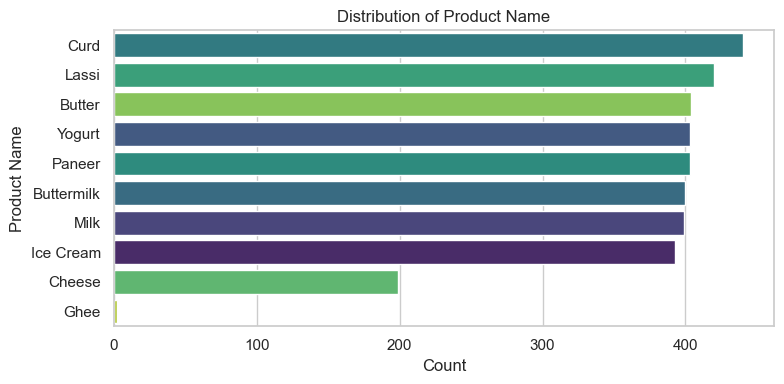

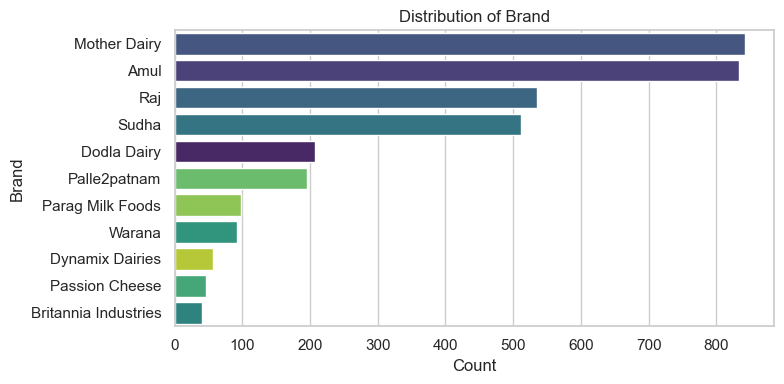

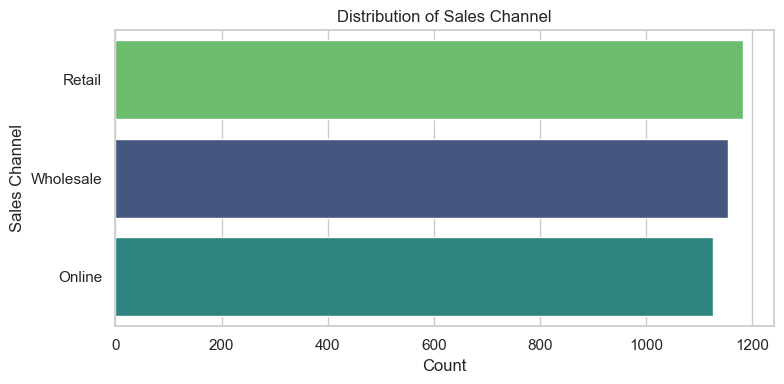

In [14]:
categorical_columns = ['Farm Size', 'Product Name', 'Brand', 'Sales Channel']

for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(
        y=df[col],
        hue=df[col],  
        order=df[col].value_counts().index,
        palette='viridis',
        legend=False  
    )
    plt.title(f"Distribution of {col}")
    plt.xlabel("Count")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()


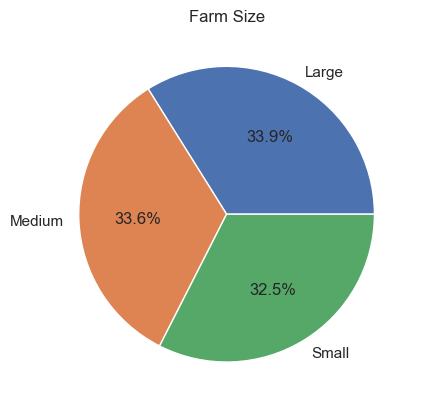

In [15]:
gender_counts = df['Farm Size'].value_counts()

plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Farm Size')
plt.show()

In [16]:
# Class imbalance analysis (Assuming a churn-related column exists, modify if needed)
if 'Churn' in df.columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=df['Churn'], palette='pastel')
    plt.title("Class Imbalance in Churn Labels")
    plt.xlabel("Churn")
    plt.ylabel("Count")
    plt.show()
else:
    print("No 'Churn' column found. Please specify the relevant column for class imbalance analysis.")


No 'Churn' column found. Please specify the relevant column for class imbalance analysis.


<div style="padding:10px;
            color:#3A3A3C;
            margin:10px;
            font-size:130%;
            border-radius:5px;
            background-color:#E5E5EA;
            font-weight:400">
    <b>Encoding</b>
</div>

In [17]:
# Identify categorical columns
cat_cols = df.select_dtypes(include=["object"]).columns

# Label Encoding (For ordinal categorical data)
label_enc = LabelEncoder()
for col in cat_cols:
    df.loc[:, col] = label_enc.fit_transform(df[col])

df.to_csv("encoded_dairy_dataset.csv", index=False)

print("Data after encoding:")
df.head()

Data after encoding:


,Location,Total Land Area (acres),Number of Cows,Farm Size,Date,Product ID,Product Name,Brand,Quantity (liters/kg),Price per Unit,...,Production Date,Expiration Date,Quantity Sold (liters/kg),Price per Unit (sold),Approx. Total Revenue(INR),Customer Location,Sales Channel,Quantity in Stock (liters/kg),Minimum Stock Threshold (liters/kg),Reorder Quantity (liters/kg)
0,12,310.84,96,1,969,5,5,2,222.40,85.72,...,1034,1037,7,82.24,575.68,8,2,215,19.55,64.03
1,13,19.19,44,0,901,1,7,0,687.48,42.61,...,955,955,558,39.24,21895.92,7,2,129,43.17,181.10
2,11,581.69,24,1,979,4,9,2,503.48,36.50,...,1050,1058,256,33.81,8655.36,8,0,247,15.10,140.83
4,9,861.95,21,1,608,8,1,4,147.77,83.85,...,637,623,145,83.07,12045.15,5,1,2,76.02,33.40
5,12,87.64,51,1,6,6,3,8,593.92,85.54,...,41,30,74,84.75,6271.50,3,1,519,55.60,139.59


In [18]:
# Scale Numerical Features 
scaler = MinMaxScaler()
df.loc[:, num_cols] = scaler.fit_transform(df[num_cols].astype(float))

df.to_csv("cleaned_dairy_dataset.csv", index=False)

print("Data after preprocessing:")
print(df.head())

Data after preprocessing:
  Location  Total Land Area (acres)  Number of Cows Farm Size Date  \
0       12                 0.303904        0.955556         1  969   
1       13                 0.009117        0.377778         0  901   
2       11                 0.577666        0.155556         1  979   
4        9                 0.860940        0.122222         1  608   
5       12                 0.078303        0.455556         1    6   

   Product ID Product Name Brand  Quantity (liters/kg)  Price per Unit  ...  \
0    0.444444            5     2              0.221518        0.841374  ...   
1    0.000000            7     0              0.687203        0.362161  ...   
2    0.333333            9     2              0.502964        0.294242  ...   
4    0.777778            1     4              0.146791        0.820587  ...   
5    0.555556            3     8              0.593522        0.839373  ...   

   Production Date  Expiration Date Quantity Sold (liters/kg)  \
0            

C:\Users\EMAM ABD EL MONSEF\AppData\Local\Temp\ipykernel_10416\1182446111.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.95555556 0.37777778 0.15555556 ... 0.61111111 0.88888889 0.53333333]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[:, num_cols] = scaler.fit_transform(df[num_cols].astype(float))
C:\Users\EMAM ABD EL MONSEF\AppData\Local\Temp\ipykernel_10416\1182446111.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.44444444 0.         0.33333333 ... 0.55555556 0.55555556 0.        ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[:, num_cols] = scaler.fit_transform(df[num_cols].astype(float))
C:\Users\EMAM ABD EL MONSEF\AppData\Local\Temp\ipykernel_10416\1182446111.py:3: FutureWarning: Setting an item of incompatible dtype is de

In [19]:
# . Encode Categorical Variables
df_encoded = df.copy()
le = LabelEncoder()
for col in df_encoded.select_dtypes(include='object').columns:
    df_encoded[col] = le.fit_transform(df_encoded[col])


In [20]:
# Define Features and Target
X = df_encoded.drop(columns=['Approx. Total Revenue(INR)'])
y = df_encoded['Approx. Total Revenue(INR)']

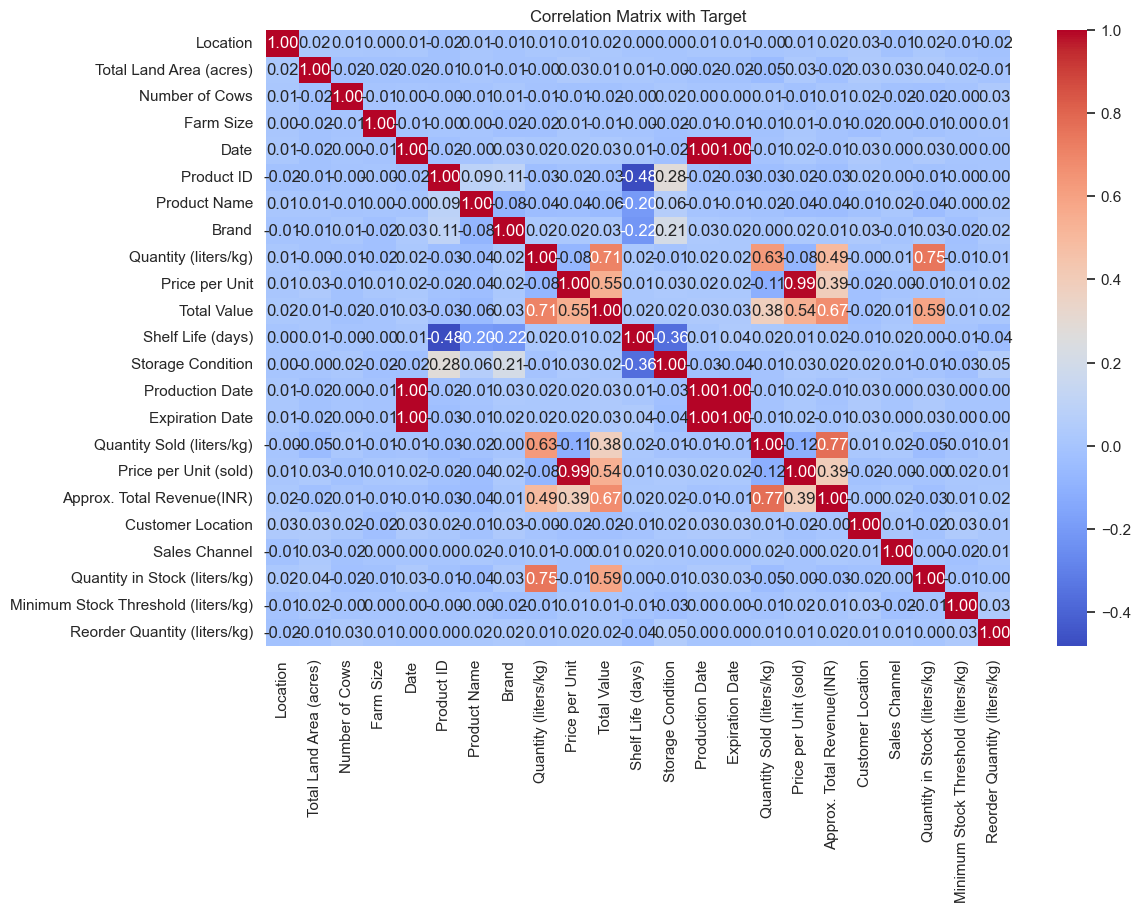

In [21]:
# Correlation Matrix (Statistical Test)
plt.figure(figsize=(12, 8))
corr = df_encoded.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix with Target")
plt.show()

<div style="padding:10px;
            color:#3A3A3C;
            margin:10px;
            font-size:130%;
            border-radius:5px;
            background-color:#E5E5EA;
            font-weight:400">
    <b>Create Model</b>
</div>

In [22]:
target="Approx. Total Revenue(INR)"
x=df.drop(target,axis=1)
y=df[target]

In [23]:
#  ANOVA (for categorical features originally)
print("\nANOVA Test Results:")
for col in df.select_dtypes(include='object').columns:
    groups = []
    for cat in df[col].unique():
        group = df[df[col] == cat]['Approx. Total Revenue(INR)']
        groups.append(group)
    f_stat, p_val = f_oneway(*groups)
    print(f"{col}: F-statistic = {f_stat:.2f}, p-value = {p_val:.4f}")


ANOVA Test Results:
Location: F-statistic = 1.07, p-value = 0.3820
Farm Size: F-statistic = 0.27, p-value = 0.7633
Date: F-statistic = 0.99, p-value = 0.5844
Product Name: F-statistic = 3.44, p-value = 0.0003
Brand: F-statistic = 2.80, p-value = 0.0019
Storage Condition: F-statistic = 3.20, p-value = 0.0123
Production Date: F-statistic = 1.00, p-value = 0.5386
Expiration Date: F-statistic = 0.94, p-value = 0.9067
Customer Location: F-statistic = 0.76, p-value = 0.7107
Sales Channel: F-statistic = 1.54, p-value = 0.2140


In [24]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [26]:
y_pred=reg.predict(x_test)

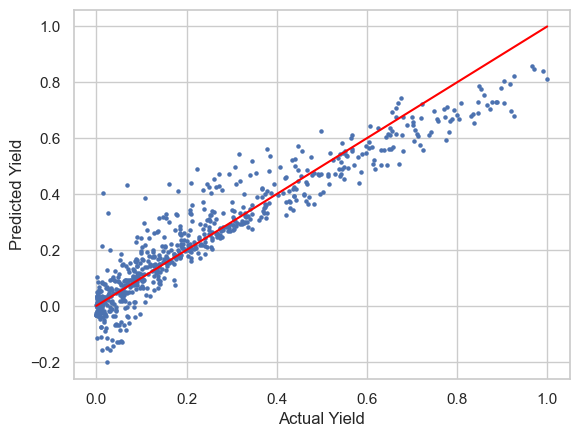

In [27]:
plt.scatter(y_test,y_pred, s= 5)
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')

In [28]:
acc = (reg.score(x_train , y_train) * 100)
print('Accuracy of Linear Regression Model Train is {:.2f}'.format(acc))
acc = (reg.score(x_test , y_test) * 100)
print('Accuracy of Linear Regression Model Test is {:.2f}'.format(acc))

Accuracy of Linear Regression Model Train is 89.32
Accuracy of Linear Regression Model Test is 88.78


MAE: 0.06
MSE: 0.01
RMSE: 0.08
R² Score: 0.89


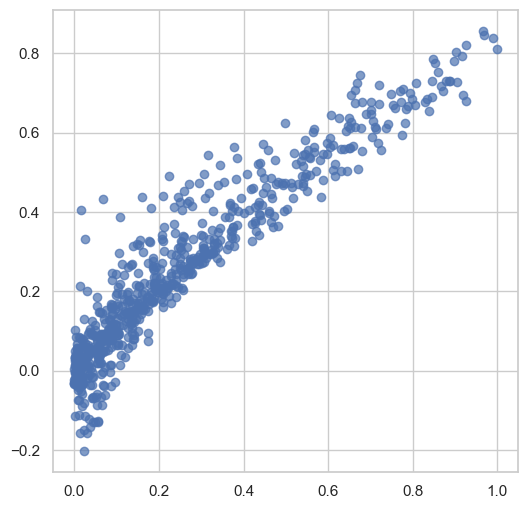

In [29]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.7, color='b')

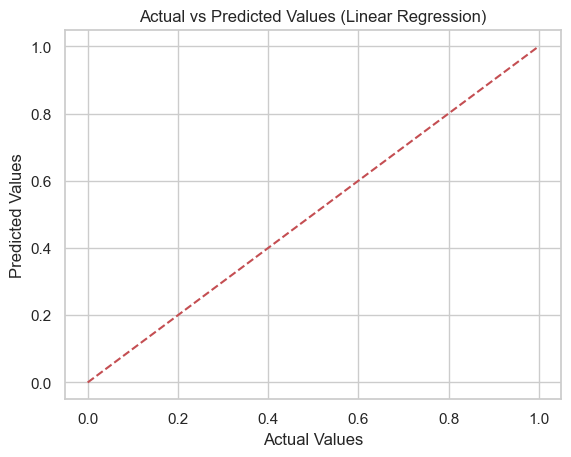

In [30]:
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values (Linear Regression)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.grid(True)
plt.show()

In [31]:
reg = DecisionTreeRegressor()

param_dist = {
    "max_depth": randint(3, 20),
    "min_samples_split": randint(2, 10),
    "min_samples_leaf": randint(1, 10),
    "max_features": ["auto", "sqrt", "log2", None]
}

In [32]:
random_search = RandomizedSearchCV(
    reg, param_distributions=param_dist,
    n_iter=50, cv=5, scoring='neg_mean_squared_error',
    random_state=42, n_jobs=-1
)
random_search.fit(x_train, y_train)

best_model = random_search.best_estimator_
print("Best parameters:", random_search.best_params_)

Best parameters: {'max_depth': 12, 'max_features': None, 'min_samples_leaf': 6, 'min_samples_split': 6}


C:\Users\EMAM ABD EL MONSEF\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
55 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\EMAM ABD EL MONSEF\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\EMAM ABD EL MONSEF\AppData\Local\Packages\PythonSoftwareFoundation.Python.

In [33]:
y_pred = best_model.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Optimized MAE: {mae:.2f}")
print(f"Optimized MSE: {mse:.2f}")
print(f"Optimized RMSE: {rmse:.2f}")
print(f"Optimized R² Score: {r2:.2f}")

Optimized MAE: 0.02
Optimized MSE: 0.00
Optimized RMSE: 0.03
Optimized R² Score: 0.99


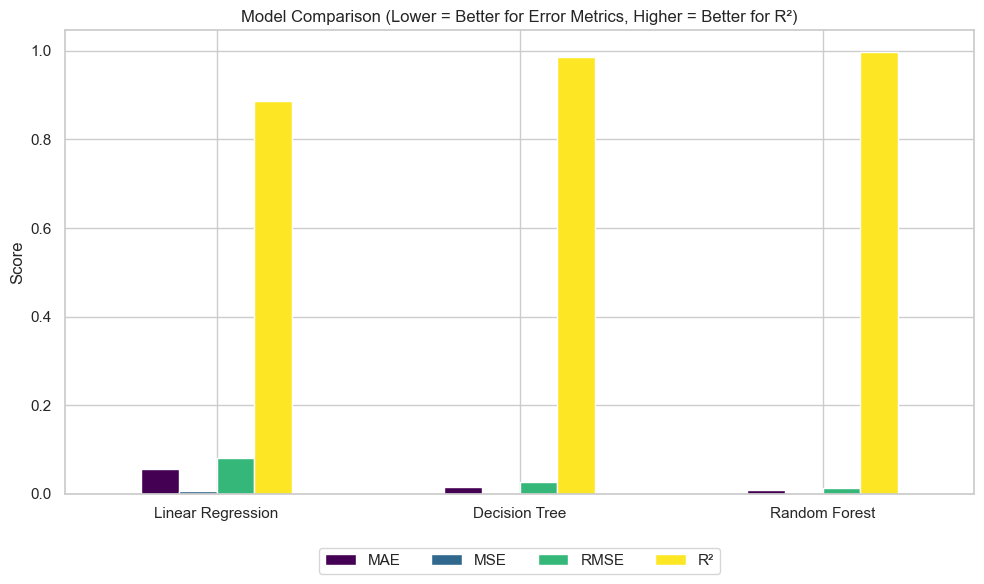

The best model is: Random Forest


In [34]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results[name] = {
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R²": r2
    }

results_df = pd.DataFrame(results).T
results_df
results_df.plot(kind='bar', figsize=(10, 6), colormap='viridis')
plt.title("Model Comparison (Lower = Better for Error Metrics, Higher = Better for R²)")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=4)
plt.tight_layout()
plt.show()

best_model_name = results_df["R²"].idxmax()
print(f"The best model is: {best_model_name}")
best_model = models[best_model_name]

In [35]:
joblib.dump(best_model, f"{best_model_name.replace(' ', '')}_model.pkl")
print(f"{best_model_name} saved as {best_model_name.replace(' ', '')}_model.pkl")

Random Forest saved as RandomForest_model.pkl


In [36]:
mlflow.set_experiment("Sales_Forecasting_RF")

<Experiment: artifact_location='file:///c:/Users/EMAM%20ABD%20EL%20MONSEF/Desktop/final/mlruns/729703331161685548', creation_time=1746897302832, experiment_id='729703331161685548', last_update_time=1746897302832, lifecycle_stage='active', name='Sales_Forecasting_RF', tags={}>

In [37]:
with mlflow.start_run():
    rf_model = RandomForestRegressor(
        n_estimators=100,
        max_depth=10,
        min_samples_split=5,
        random_state=42
    )

    rf_model.fit(x_train, y_train)
    y_pred = rf_model.predict(x_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    mlflow.log_param("n_estimators", 100)
    mlflow.log_param("max_depth", 10)
    mlflow.log_param("min_samples_split", 5)

    mlflow.log_metric("MAE", mae)
    mlflow.log_metric("MSE", mse)
    mlflow.log_metric("RMSE", rmse)
    mlflow.log_metric("R2", r2)

    mlflow.sklearn.log_model(rf_model, "random_forest_model")

    print("✅ Experiment Logged to MLflow!")

2025/05/10 21:05:20 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


✅ Experiment Logged to MLflow!


In [38]:
# Save the trained Random Forest model
joblib.dump(rf_model, 'model.pkl')

print("✅ Model saved as model.pkl") 

✅ Model saved as model.pkl


In [39]:
# Encode all object columns
cat_cols = df.select_dtypes(include=["object"]).columns
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Save label encoders to a file
with open("label_encoders.pkl", "wb") as f:
    pickle.dump(label_encoders, f)

# Save the encoded dataset 
df.to_csv("encoded_dairy_dataset.csv", index=False)

C:\Users\EMAM ABD EL MONSEF\AppData\Local\Temp\ipykernel_10416\3333270920.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
C:\Users\EMAM ABD EL MONSEF\AppData\Local\Temp\ipykernel_10416\3333270920.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
C:\Users\EMAM ABD EL MONSEF\AppData\Local\Temp\ipykernel_10416\3333270920.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

In [40]:
label_encoders = joblib.load('label_encoders.pkl')  
print(label_encoders.keys())  

dict_keys(['Location', 'Farm Size', 'Date', 'Product Name', 'Brand', 'Storage Condition', 'Production Date', 'Expiration Date', 'Customer Location', 'Sales Channel'])


In [41]:
features_used = ['Location' , 'Total Land Area (acres)' , 'Number of Cows' , 'Farm Size' , 'Date' , 'Product ID' , 'Product Name' ,

'Brand','Quantity (liters/kg)','Price per Unit' ,'Total Value' ,'Shelf Life (days)' ,'Storage Condition' ,'Production Date' ,
"Expiration Date" ,
"Quantity Sold (liters/kg)" ,
"Price per Unit (sold)" ,

"Customer Location" ,
"Sales Channel" ,
"Quantity in Stock (liters/kg)" ,
"Minimum Stock Threshold (liters/kg)" ,
"Reorder Quantity (liters/kg)" ]

with open('features_used.pkl', 'wb') as f:
    pickle.dump(features_used, f)